<img src="front_presentation_exoplanets.png">
(Credits: Wing-Fai Thi)

## Exploring the Kepler and other exoplanet datasets
### Can machine learning algorithm determine if an exoplanet is habitable?

_version 1 (19/3/2018)_

_version 1.1 (29/3/2018) introduce the notion of compressed density and uncompressed density, generate more plots, predict the habitability of Solar System planets_

_Wing-Fai Thi_

_26/3/2018: there is a bug in /Library/Python/2.7/site-packages/sklearn/preprocessing/label.py Please copy the corrected version from the GitHub site sklearn::master and replace it_

- Dataset from The Planet Habitability Laboratory's Exoplanets Catalog at the Univeristy of Puerto Rico

from their website:

The PHL's Exoplanets Catalog (PHL-EC) contains observed and modeled parameters for all currently confirmed exoplanets from the Extrasolar Planets Encyclopedia and NASA Kepler candidates from the NASA Exoplanet Archive, including those potentially habitable. It also contains a few still unconfirmed exoplanets of interest. The main difference between PHL-EC and other exoplanets databases is that it contains more estimated stellar and planetary parameters, habitability assessments with various habitability metrics, planetary classifications, and many corrections. Some interesting inclusions are the identification of those stars in the Catalog of Nearby Habitable Systems (HabCat), the apparent size and brightness of stars and planets as seen from a vantage point (i.e. moon-Earth distance), and the location constellation of each planet.

Many scientists use the PHL-EC and its derived products, like The Habitable Exoplanets Catalog and The Periodic Table of Exoplanets, for research or educational purposes. Software tools, such as the Google Android application Exoplanet Explorer, also use the catalog for visualizations. The PHL-EC is available as a comma separated value format (CSV) file at the bottom of this page. It is easily readable by spreadsheets like MS Excel and by most scientific plotting software.

- Dataset from the exoplanet catalogue.

#### Aim of the notebook:
- explore the exoplanet detection and characterisation statistics
- classification of exoplanets acording to their type and habitability

#### Ref.
- Patrick Irwine Giant Planets of out Solar System 2nd edition, Springer
- Helmut Lammer and Maxim Khodachenko editors, Characterizating Stellar and Exoplanetary Environments, Springer
- Michael Carr & James Bell III Mars: Surface and interior, in Encyclopedia of the Solar System, 2014 Elsevier
- Nikku Madhusudhan et al. Exoplanetary Atmopsheres, Protostars and protoplanets VI
- Michal Endl Extrasolar Planets, in Encyclopedia of the Solar System, 2014 Elsevier
- Ollivier M., Encrenaz T., Roques F., Selsis F., Casoli, F. Planetary Systems A&A Library, Springer
- Eugen Milone and William Wilson Solar System Astrophysics, Springer
- Helmut Lammer Origin and Evolution of Planetary Atmosphers - Implication for habitability,Springer
- Methods of Detecting Exoplanets, V. Bozza, Mancini, A.Sozzetti editors, 2016, Springer
- P. Cassen, T. Guillot, A. Quirrenbach, Extrasolar Planets, Saas-Fee Springer
- Scott L. Murchie et al. Mercury in Encyclopedia of the Solar System. http://dx.doi.org/10.1016/B978-0-12-415845-0.00013-X Copyright ! 2014 Elsevier Inc.
- Leland Wilkinson The Grammar of Graphics, Springer
- Handbook of Data Visualization Springer

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb
import pandas as pd
import scipy.stats as stats

# get configuration file location
#print (mpl.matplotlib_fname())

# get configuration current settings
#print (mpl.rcParams)
default = mpl.rcParams
# Change the default settings
mpl.rcParams.update({'figure.figsize': (9.0, 7.0),
                     'figure.dpi' : 300, # 300 dpi for print
                    'font.size': 14,
                     'legend.frameon': False,              
                     'legend.fontsize' : 12, 
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.labelsize'  : 18  
                    })

In [2]:
kepler = pd.read_csv('phl_hec_all_kepler.csv')

In [3]:
#kepler.info() # uncomment if you want to list the header

In [4]:
kepler.describe()

P. Name KOI  P. Min Mass (EU)  P. Mass (EU)  P. Max Mass (EU)  \
count  4302.000000               0.0   3763.000000               0.0   
mean   2609.274133               NaN     17.686205               NaN   
std    1961.450252               NaN     69.556488               NaN   
min       1.010000               NaN      0.020000               NaN   
25%     955.260000               NaN      1.970000               NaN   
50%    2158.515000               NaN      4.580000               NaN   
75%    3733.760000               NaN     10.820000               NaN   
max    7617.010000               NaN   1506.590000               NaN   

       P. Radius (EU)  P. Density (EU)  P. Gravity (EU)  P. Esc Vel (EU)  \
count     4270.000000      3763.000000      3763.000000      3763.000000   
mean        88.291932         0.842687         1.559325         1.752078   
std       1196.836000         0.453170         1.045284         0.970168   
min          0.320000         0.190000         0.230000         0.270000   
25%          1.330000         0.210000         0.720000         1.160000   
50%          2.020000         0.930000         1.250000         1.500000   
75%          3.237500         1.140000         2.090000         2.150000   
max      48558.700000         1.720000        11.040000        11.360000   

       P. Teq Min (K)  P. Teq Mean (K)      ...             P. HZI  \
count     4270.000000      4270.000000      ...        3763.000000   
mean       886.536066       886.536089      ...           0.277624   
std        541.358174       541.358157      ...           0.060598   
min        131.500000       131.500000      ...           0.070000   
25%        557.900000       557.900000      ...           0.240000   
50%        785.500000       785.500000      ...           0.280000   
75%       1087.675000      1087.675000      ...           0.310000   
max      14218.900000     14218.900000      ...           0.790000   

            P. SPH  P. Int ESI  P. Surf ESI       P. ESI  S. HabCat  \
count  3228.000000      4302.0       4302.0  4270.000000     4302.0   
mean      0.005861         0.0          0.0     0.275689        0.0   
std       0.066095         0.0          0.0     0.127946        0.0   
min       0.000000         0.0          0.0     0.000000        0.0   
25%       0.000000         0.0          0.0     0.240000        0.0   
50%       0.000000         0.0          0.0     0.280000        0.0   
75%       0.000000         0.0          0.0     0.310000        0.0   
max       1.000000         0.0          0.0     0.930000        0.0   

       P. Habitable  P. Hab Moon  P. Confirmed  P. Disc. Year  
count   4302.000000  4302.000000   4302.000000         4302.0  
mean       0.014644     0.005579      0.229196         2015.0  
std        0.120138     0.074491      0.420364            0.0  
min        0.000000     0.000000      0.000000         2015.0  
25%        0.000000     0.000000      0.000000         2015.0  
50%        0.000000     0.000000      0.000000         2015.0  
75%        0.000000     0.000000      0.000000         2015.0  
max        1.000000     1.000000      1.000000         2015.0  

[8 rows x 52 columns]

In [5]:
kepler_data=kepler[['P. Mass (EU)','P. Radius (EU)']].dropna()

The density of planets give us important clues about the planet's composition. We are interested by kowing how much of each terrestrial planet is made up by iron core compared to the lower density silicate (rocky) crust mantle. The density of the planet is the sum of the percent having the density of the core and the percent having the density of silicate.

planet density = %core/100 x core density + (1-%core/100) x silicate density = mass of the plante / volumne of the planet

By rearranging the equation we obtain

% core = (planet density - silicate density)/(core density - silicate density) x 100

The uncompressed mean densities of the terrestrial planets and the Moon vary with the relative volume proportions of cores and mantles. However the mean density we obtain by dividing the planet's mass by its volume is the compressed mean density, whereby the high pressure at the center of the planets increases the density.


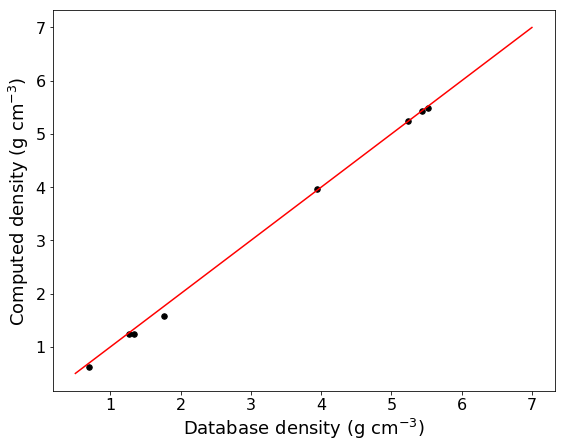

Check the planet density computation
[0.99968496 1.00030968 0.99606266 1.00829923 0.93487509 0.8975821
 0.97997836 0.89974988]


In [6]:
#uncompressed_density core mass fraction (Taylor and McLennan, 2009)
# Earth    3.96       16%
# Venus    3.9        ~12%
# Mars     3.7        ~9%
# Mercury  5.0        ~42%
# Moon     3.27       < 2%

# Venus 0.723 au Mars 1.523 au 
# Venus radius = 6.051 km, Mass diameter =  3389.5 km 
# Venus mass = 4.8675e24 kg, Mars mass =  6.4171e23 kg
# Venus = density 5.243, Mars density =  3.9335 g/cm^3

# Mercury
# mean density = 5.44

# Murchie
# Earth uncompressed density is 4.4 g/cm^3
# Mercury uncompressed density is 5.3 g/cm^3

Earth_radius = 6378. # km
MEarth_gr = 5.97e27 # gr
km_to_cm = 1e5

distance_solar_system_planets = np.array([0.387,0.7233,1.0,1.523,5.2,9.5,19.2,30.1])

radius_solar_system_planets=np.array([0.3825,0.9488,1.,0.53,11.2,9.4,4.0,3.9])

mass_solar_system_planets=np.array([0.0553,0.8150,1.0,0.107489,318.,95.,14.5,17.1])

solar_system_planets=['Mercury','Venus','Earth','Mars','Jupiter',
                      'Saturn','Uranus','Neptune']

percent_core_solar_system = [42.,12.,16.,9.]

density_solar_system_planets=np.array([5.43,5.24,5.515,3.9335,
                                       1.33,0.7,1.27,1.76]) # gr/cm^3

volume_ss_planets =(4*np.pi/3)*(radius_solar_system_planets*Earth_radius*km_to_cm)**3

computed_density_solar_system = mass_solar_system_planets*MEarth_gr/volume_ss_planets

xradius = np.linspace(0.01,30,1000) # in Earth radius
volume =(4*np.pi/3)*(xradius*Earth_radius*km_to_cm)**3
mass_rho_planet = []
for rho in density_solar_system_planets:
    mass_rho_planet.append(rho*volume/MEarth_gr) #Earth mass

data_solar_system = pd.DataFrame({'name': solar_system_planets,
                     'distance (au)':distance_solar_system_planets,
                     'radius (EU)':radius_solar_system_planets,
                     'mass (EU)':mass_solar_system_planets,
                     'density (cgs)': density_solar_system_planets})

# solid materials
# gold 19.3
# silver 10.5
# lead 11.34
# zinc 7.14
# copper 9.0/8.96
# nickel 8.9
# Stony iron 4.35
# Earth radius is determined by the composition and internal pressure
# check Equation of state
#
# Earh upper mantle  720 km   thickness  3.4 g/cm^3
# Earth lower mantle 2.171 km thickness  4.4 g/cm^3
# Earth core         2.259 km,           9.9 g/cm^3
# Earth inner core   1.221 km           12.8 g/cm^3
# uncompressed Earth                     4.4 g/cm^3
density_solids = np.array([12.8,9.9,7.87,4.35,3.71,1.0])
solids = ['Earth inner core','Earth core','Iron metal','Stony iron','Olivine','Ice']
data_solids = pd.DataFrame({'name':solids,'density (cgs)': density_solids})

density_iron = density_solids[0]
# mass of pure iron planets in MEarth
mass_iron_planet = (4/3*np.pi)*density_iron*(xradius*Earth_radius*km_to_cm)**3/MEarth_gr

#
nH = 1e23 # cm^-3 average 
mH = 1.67e-24 # gr
density_gas = mH*nH
#print density_gas
mass_pure_H_planet = (4/3*np.pi)*density_gas*(xradius*Earth_radius*km_to_cm)**3/MEarth_gr

for rho in density_solids:
    mass_rho_planet.append(rho*volume/MEarth_gr) #Earth mass

#mass_rho_planet = np.array(mass_rho_planet)

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
xmin = 0.5
xmax = 7
ymin = 0.5
ymax = 7
ax.plot([xmin,xmax],[ymin,ymax],color='red')
ax.scatter(density_solar_system_planets,computed_density_solar_system,s=30,color='black')
ax.set_ylabel(r'Computed density (g cm$^{-3}$)', fontsize=18)
ax.set_xlabel(r'Database density (g cm$^{-3}$)', fontsize=18)
plt.show()
print "Check the planet density computation"
print computed_density_solar_system/density_solar_system_planets

In [7]:
# download the catalogue from exoplanet.eu
exo = pd.read_csv('exoplanet.eu_catalog.csv')
#df.str.startswith('kepler'))
exo =exo[exo['# name'].str.contains('Kepler') == 0] # remove the Kepler planet from this list
exo =exo[exo['mass_error_min'] != 0] # remove the upper limit in mass
exo =exo[exo['mass_error_max'] != 0]
exo_data=exo[['# name','mass','radius']].dropna() # remove the planets with NaN
MJupiter = 318  # in MEarth
RJupiter = 11.2 # in REarth
exo_data['mass']=exo_data['mass']*MJupiter # conversion to Earth units
exo_data['radius']=exo_data['radius']*RJupiter
y_exo=np.array(exo_data['mass'])
x_exo=np.array(exo_data['radius'])

Earth_radius = 6378. # km
MEarth_gr = 5.97e27  # gr
km_to_cm  = 1e5      # 1e5 cm = 1 km
max_mass  = 10 # in Jupiter mass
exo_density_all = y_exo/(4/3.*np.pi*(x_exo*Earth_radius*km_to_cm)**3)*MEarth_gr
wexo = (y_exo < max_mass*MJupiter)
wupper=((exo_density_all > density_solids.max()) & (y_exo < max_mass*MJupiter))
exo_density = y_exo[wexo]/(4/3.*np.pi*(x_exo[wexo]*Earth_radius*km_to_cm)**3)*MEarth_gr
exo_radius  = x_exo[wexo]
exo_mass    = y_exo[wexo]
#print exo_data[wupper]

Solid water ice will have density 1 g/cm3, solid rock will have densities around 3-5 g/cm3, and porous structures will have lower density. The Earth mean density (5.515 g/cm3) is high. Gaseous planets have density of the order of 1, because they have a solid core.

In [8]:
y_kepler=np.array(kepler_data['P. Mass (EU)'])
x_kepler=np.array(kepler_data['P. Radius (EU)'])
exo_density_kepler = y_kepler/(4/3.*np.pi*(x_kepler*Earth_radius*km_to_cm)**3)*MEarth_gr
exo_density= np.append(exo_density, exo_density_kepler)
exo_radius= np.append(exo_radius, x_kepler)
exo_mass = np.append(exo_mass, y_kepler)

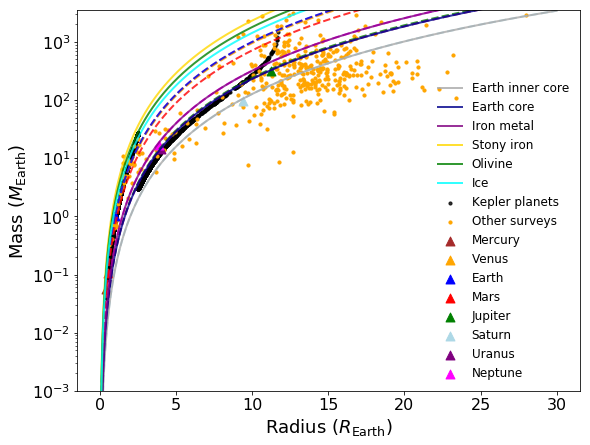

In [9]:
colors = ['brown','orange','blue','red','green','lightblue','purple','magenta']
colors2 = ['darkgray','darkblue','purple','gold','green','cyan']

def plot_mass_radius():
    fig = plt.figure(figsize=(9,7))
    ax = plt.subplot(111)
    ax.scatter(x_kepler,y_kepler,s=10,label='Kepler planets',alpha=0.8,color='black')
    ax.scatter(x_exo[wexo],y_exo[wexo],s=10,label='Other surveys',alpha=1.0,color='orange')
    #ax.scatter(x_exo[wupper],y_exo[wupper],s=5,
    #label='Other surveys upper limit',alpha=1.0,color='red')
    
    for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)
        ax.plot(xradius,mass_rho_planet[i],ls='--',linewidth=2.0,color=col,alpha=0.8)

    for i,(name,col) in enumerate(zip(solids,colors2)):
        ax.plot(xradius,mass_rho_planet[i+5],ls='-',linewidth=2.0,
                color=col,alpha=0.8,label=name)
    
    #ax.set_xscale("log",nonposx='clip')
    ax.set_yscale("log",nonposy='clip')
    ax.set_xlabel(r'Radius ($R_{\rm Earth}$)', fontsize=18)
    ax.set_ylabel(r'Mass ($M_{\rm Earth}$)', fontsize=18)
    #ax.set_xlim(1e-2,5.)
    ax.set_ylim(1e-3,max_mass*MJupiter*1.1)
    ax.legend()
    plt.show()

x_ssp = radius_solar_system_planets
y_ssp = mass_solar_system_planets
plot_mass_radius()

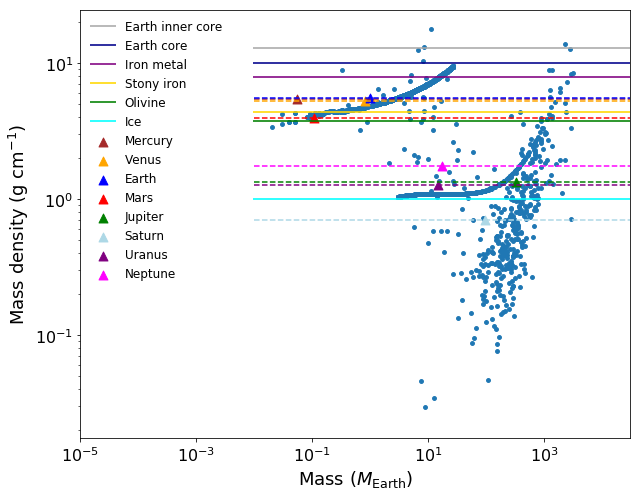

In [10]:
# plot the planet mean density versus the planet mass
y_ssp = density_solar_system_planets
x_ssp = mass_solar_system_planets

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)

ax.scatter(exo_mass,exo_density,s=15)
xmin = exo_mass.min()*0.5
xmax=3e4

for name,rho,col in zip(solids,density_solids,colors2):
        ax.plot([xmin,xmax],[rho,rho] ,ls='-',linewidth=2.0,color=col,alpha=0.8,label=name)

for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)
        ax.plot([xmin,xmax],[y_ssp[i],y_ssp[i]],color=col,ls='--')
        
ax.set_xlim(1e-5,xmax)
ax.set_yscale("log",nonposy='clip')
ax.set_xscale("log",nonposx='clip')
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xlabel(r'Mass ($M_{\rm Earth}$)', fontsize=18)
ax.legend()
plt.tight_layout()
plt.savefig("kepler_density_mass.png")
plt.show()

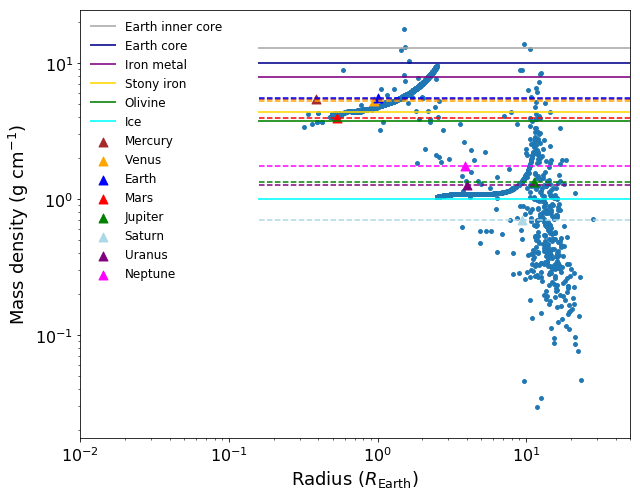

In [11]:
y_ssp = density_solar_system_planets
x_ssp = radius_solar_system_planets

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.scatter(exo_radius,exo_density,s=15)
xmin = exo_radius.min()*0.5
xmax=50

for name,rho,col in zip(solids,density_solids,colors2):
        ax.plot([xmin,xmax],[rho,rho] ,ls='-',linewidth=2.0,color=col,alpha=0.8,label=name)

for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)
        ax.plot([xmin,xmax],[y_ssp[i],y_ssp[i]],color=col,ls='--')
        
ax.set_xlim(0.01,xmax)
ax.set_yscale("log",nonposy='clip')
ax.set_xscale("log",nonposx='clip')
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xlabel(r'Radius ($R_{\rm Earth}$)', fontsize=18)
ax.legend()
plt.tight_layout()
plt.savefig("kepler_density_radius.png")
plt.show()

Titan Coustenis 
radius = 2575 km
mass = 1.35e23 kg
surface temperature= 93.6 K
mean density =1.88 g/cm^3

Europa Prockter
radius 1560.8 km
density 3.013 g/cm^3
mass = 4.79955e22

Mercury
density 5440 g/cm^3
mass = 3.301e23 kg
diameter 4880 km

- escape velocity = sqrt(2 M Grav / R) = v
- mv^2/2 > mMG/R
- (1/2) kT > m G (M/R): atom so that there is a factor 1/2
- G cgs = 6.674e-8 dyn/cm^2/g^2
- R(esc) = mGM/kT
- k = 1.38e-16 (cgs)

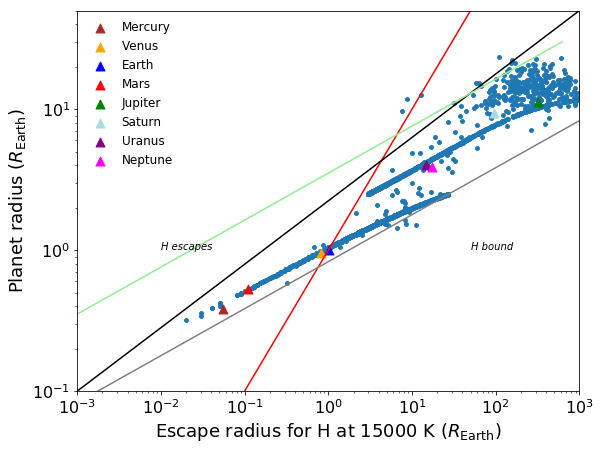

In [12]:
Grav = 6.6725985e-8 # gravitational constant
mH = 1.67e-24 # gr
T = 15000.     # T in Kelvin
kb = 1.380658e-16 # Boltzmann erg/K
Resc = (2.*mH*Grav*(exo_mass*MEarth_gr))/(kb*T) # cm
Resc = Resc/(Earth_radius*km_to_cm) # in Earth radius

Resc_iron = (2.*mH*Grav*(mass_iron_planet*MEarth_gr))/(kb*T) # cm
Resc_iron = Resc_iron/(Earth_radius*km_to_cm) # in Earth radius
# xradius

Resc_pure_H = (2.*mH*Grav*(mass_pure_H_planet*MEarth_gr))/(kb*T)
Resc_pure_H = Resc_pure_H/(Earth_radius*km_to_cm) # in Earth radius

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
xmin = 0.001
xmax = 1e3
ymin = 0.1
ymax = 50
ax.plot([1e-3,1e3],[1e-3,1e3],color='red')
ax.plot([xmin,xmax],[ymin,ymax],color='black')

ax.scatter(Resc,exo_radius,s=15)

y_ssp = radius_solar_system_planets
Resc_ssp = (2.*mH*Grav*(mass_solar_system_planets*MEarth_gr))/(kb*T) # in cm
x_ssp = Resc_ssp/(Earth_radius*km_to_cm) # in Earth radius
for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)

ax.plot(Resc_iron,xradius,color='gray')
ax.plot(Resc_pure_H,xradius,color='lightgreen')
       
ax.set_xscale("log",nonposx='clip')
ax.set_yscale("log",nonposy='clip')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_ylabel(r'Planet radius ($R_{\rm Earth}}$)', fontsize=18)
ax.set_xlabel(r'Escape radius for H at 15000 K ($R_{\rm Earth}$)', fontsize=18)
ax.text(50,1,'H bound',style='italic')
ax.text(1e-2,1,'H escapes',style='italic')
ax.legend()
plt.show()

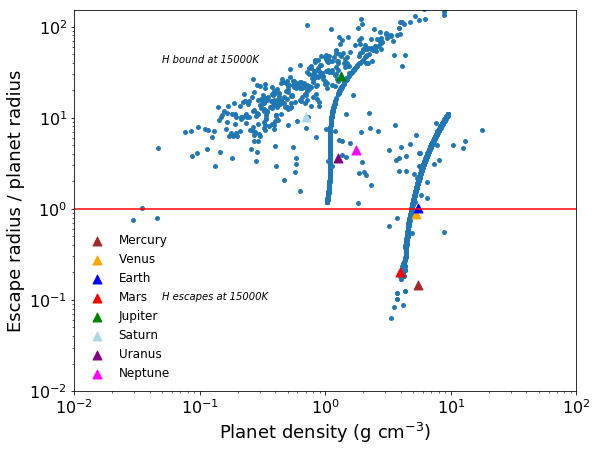

In [13]:
x_ssp = density_solar_system_planets
Resc_ssp = (2.*mH*Grav*(mass_solar_system_planets*MEarth_gr))/(kb*T) # in cm
y_ssp = (Resc_ssp/(Earth_radius*km_to_cm))/radius_solar_system_planets

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
xmin = 0.01
xmax = 1e2
ymin = 0.01
ymax = 150
ax.plot([xmin,xmax],[1,1],color='red')
ax.scatter(exo_density,Resc/exo_radius,s=15)

for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)

ax.set_xscale("log",nonposx='clip')
ax.set_yscale("log",nonposy='clip')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_ylabel(r'Escape radius / planet radius', fontsize=18)
ax.set_xlabel(r'Planet density (g cm$^{-3}$)', fontsize=18)
ax.text(5e-2,40,'H bound at 15000K',style='italic')
ax.text(5e-2,0.1,'H escapes at 15000K',style='italic')
ax.legend()
plt.savefig("kepler_escape_density.png")
plt.show()

The data in the exoplanet catalogues do not have distances

In [14]:
# We restrict ourself to the Kepler planets
print kepler.shape # 947 confirmed out of 3763 in total
#kepler_data=kepler_data[kepler['P. Confirmed'] == 1] 
# if uncommented we will only choose the confirmed planetss

(4302, 68)


In [15]:
Earth_radius = 6378. # km
MEarth_gr = 5.97e27  # gr
km_to_cm  = 1e5      # 1e5 cm = 1 km
distance = kepler['P. Mean Distance (AU)']
minHZ = kepler['S. Hab Zone Min (AU)']
maxHZ = kepler['S. Hab Zone Max (AU)']
mass = kepler['P. Mass (EU)']
mass_star = kepler['S. Mass (SU)']
radius = kepler['P. Radius (EU)']
composition= kepler['P. Composition Class']
Habitable_class = kepler['P. Habitable Class']
Habitable = kepler['P. Habitable']
atmosphere = kepler['P. Atmosphere Class']
density_Earth = 5.515 # g/cm^3
density = (mass*MEarth_gr)/(4*np.pi/3*(radius*Earth_radius*km_to_cm)**3)
density_kepler = kepler['P. Density (EU)']*density_Earth

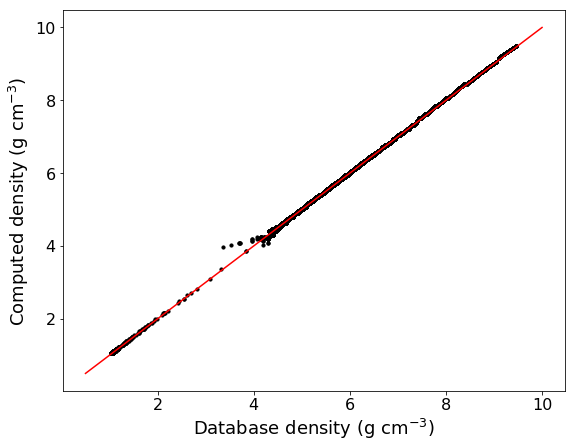

In [16]:
# Plot the comparison between the listed men density and y computation
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
xmin = 0.5
xmax = 10
ymin = 0.5
ymax = 10
ax.plot([xmin,xmax],[ymin,ymax],color='red')
ax.scatter(density,density_kepler,s=10,color='black')
ax.set_ylabel(r'Computed density (g cm$^{-3}$)', fontsize=18)
ax.set_xlabel(r'Database density (g cm$^{-3}$)', fontsize=18)
plt.show()

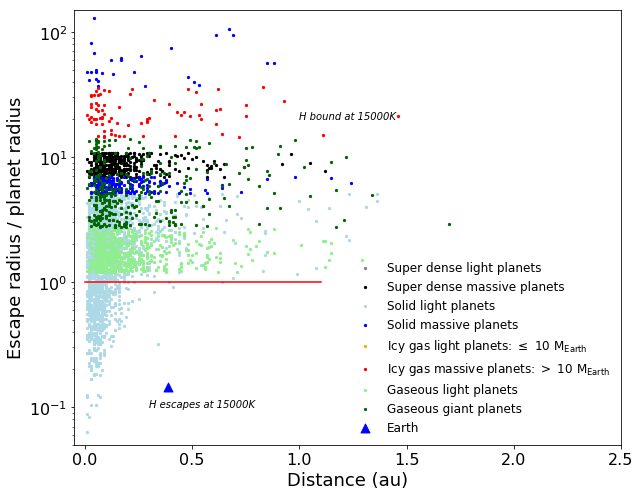

In [17]:
x_ssp = distance_solar_system_planets
Resc_ssp = (2.*mH*Grav*(mass_solar_system_planets*MEarth_gr))/(kb*T) # in cm
y_ssp = (Resc_ssp/(Earth_radius*km_to_cm))/radius_solar_system_planets

Resc = (2.*mH*Grav*(mass*MEarth_gr))/(kb*T) # cm
Resc = Resc/(Earth_radius*km_to_cm) # in Earth radius

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
xmin = 0.001
xmax = 2
ymin = 0.01
ymax = 150
ax.plot([xmin,1.1],[1,1],color='red')
m_core = 10.
rho_icy = 1.8
rho_gas = 1.2
rho_iron = 7.87 # density_solids[0] # 7.87

w_super_dense_light     =  ((density_kepler > rho_iron) & (mass <= m_core))
w_super_dense_massive   =  ((density_kepler > rho_iron) & (mass > m_core))


w_solid_light     = ((density_kepler >= rho_icy) & (density_kepler <= rho_iron) 
                     & (mass <= m_core))
w_solid_massive   = ((density_kepler >= rho_icy) & (density_kepler <= rho_iron) 
                     & (mass >  m_core))

w_ice_gas_light   = (( density_kepler > rho_gas ) & (density_kepler <  rho_icy) 
                     & (mass <= m_core))
w_ice_gas_massive = (( density_kepler > rho_gas ) & (density_kepler <  rho_icy) 
                     & (mass > m_core))

w_gas_light       = ((density_kepler < rho_gas) & (mass <= m_core))
w_gas_massive     = ((density_kepler < rho_gas) & (mass > m_core))

ratio = Resc/radius
labels = [r'Super dense light planets',
          r'Super dense massive planets',
          r'Solid light planets',
          r'Solid massive planets',
          r'Icy gas light planets: $\leq$ 10 M$_{\rm Earth}$',
          r'Icy gas massive planets: $>$ 10 M$_{\rm Earth}$',
          r'Gaseous light planets',
          r'Gaseous giant planets']

psize = 5
ax.scatter(distance[w_super_dense_light],ratio[w_super_dense_light],s=psize,
           color='gray',label=labels[0])

ax.scatter(distance[w_super_dense_massive],ratio[w_super_dense_massive],s=psize,
           color='black',label=labels[1])


ax.scatter(distance[w_solid_light],ratio[w_solid_light],s=psize,
           color='lightblue',label=labels[2])
ax.scatter(distance[w_solid_massive],ratio[w_solid_massive],s=psize,
           color='blue',label=labels[3])

ax.scatter(distance[w_ice_gas_light],ratio[w_ice_gas_light],s=psize,
           color='orange',label=labels[4])
ax.scatter(distance[w_ice_gas_massive],ratio[w_ice_gas_massive],s=psize,
           color='red',label=labels[5])

ax.scatter(distance[w_gas_light],ratio[w_gas_light],s=psize,
           color='lightgreen',label=labels[6])
ax.scatter(distance[w_gas_massive],ratio[w_gas_massive],s=psize,
           color='darkgreen',label=labels[7])

ax.scatter(x_ssp[0],y_ssp[0],marker='^',s=80,color='blue',label='Earth')

#ax.set_xscale("log",nonposx='clip')
ax.set_yscale("log",nonposy='clip')
ax.set_xlim(-0.05,2.5)
ax.set_ylim(0.05,ymax)
ax.set_ylabel(r'Escape radius / planet radius', fontsize=18)
ax.set_xlabel(r'Distance (au)', fontsize=18)
ax.text(1.0,20,'H bound at 15000K',style='italic')
ax.text(0.3,0.1,'H escapes at 15000K',style='italic')
ax.legend()
plt.tight_layout()
plt.savefig("kepler_escape_distance.png")
plt.show()

- Luminosity of a star ~ Mstar^4
- Teq = 280 K / sqrt(a/1 au) *(Mstar/Msun)
- Tice = 150K
- a(in au) = [(280/150)*(Mstar/Msun)]^2 = 3.48 * (Mstar/Msun)^2

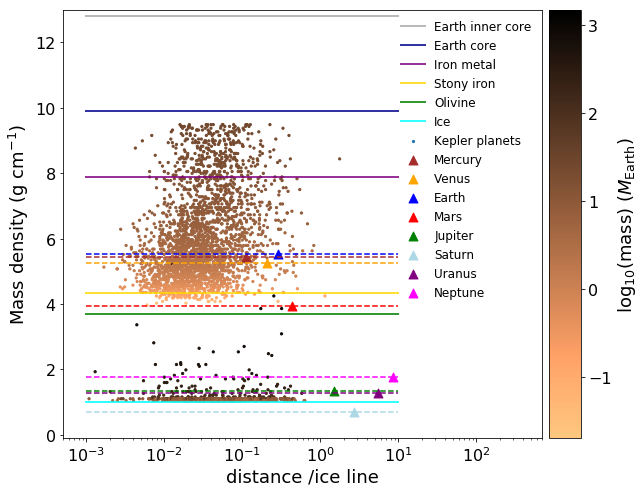

In [18]:
y_ssp = density_solar_system_planets
ice_line_solar_system = 3.48

ice_line_kepler = 3.48 * mass_star**2

x_ssp = distance_solar_system_planets/ice_line_solar_system

gas = (density_kepler < rho_icy)

fig = plt.figure(figsize=(9,7))

ax = plt.subplot(111)
# factor 0.85 on the density?
s=ax.scatter(distance/ice_line_kepler,density_kepler,
             s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_xlabel(r'distance /ice line', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(16)
    tick.set_fontname('DejaVu Sans')
    tick.set_color('black')
#    tick.set_weight('bold')

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(16)
    tick.set_fontname('DejaVu Sans')
    tick.set_color('black')


xmin = 1e-3
xmax = 10.
for name,rho,col in zip(solids,density_solids,colors2):
        ax.plot([xmin,xmax],[rho,rho] ,ls='-',linewidth=2.0,
                color=col,alpha=0.8,label=name)

for i,(name,col) in enumerate(zip(solar_system_planets,colors)):
        ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)
        ax.plot([xmin,xmax],[y_ssp[i],y_ssp[i]],color=col,ls='--')

ax.set_ylim(-0.1,13)
ax.set_xlim(5e-4,700)

ax.set_xscale("log",nonposx='clip')
#ax.set_yscale("log",nonposy='clip')
ax.legend()
colorbar_ax = fig.add_axes([0.85,0.1,0.05,0.85])
fig.colorbar(s, cax=colorbar_ax,label=(r'$\log_{10}$(mass) ($M_{\rm Earth}}$)'))
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.84,
                        wspace=0.05)
plt.savefig("kepler_density_ice_line.png")
plt.show()

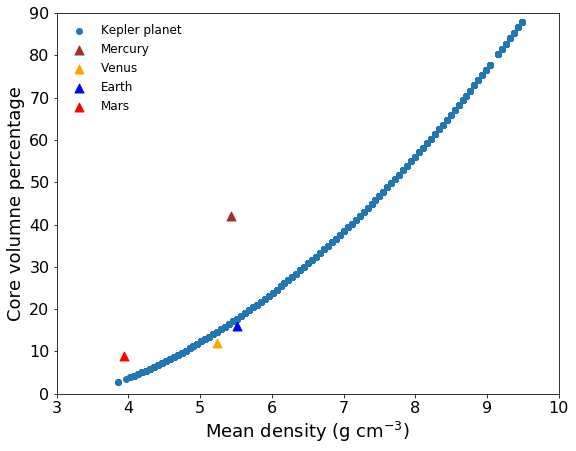

In [19]:
core_density   = 9.9 # gcc compressed
mantle_density = 3.4 # gcc
mass_percentage_core = (density_kepler - mantle_density)/(core_density - mantle_density)*100
volume_percentage_core = mass_percentage_core*density_kepler*core_density * 1e-2

w_terrestrial   =  (density_kepler > mantle_density)
w_ss_terrestrial = (density_solar_system_planets > mantle_density)
x_ssp = density_solar_system_planets[w_ss_terrestrial]
y_ssp = (x_ssp - mantle_density)/(core_density - mantle_density)*100

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.scatter(density_kepler[w_terrestrial],
           volume_percentage_core[w_terrestrial],label='Kepler planet')
for i,(name,col) in enumerate(zip(solar_system_planets[0:4],colors[0:4])):
    ax.scatter(x_ssp[i],percent_core_solar_system[i],marker='^'
               ,s=80,color=col,label=name)
ax.set_xlabel(r'Mean density (g cm$^{-3}$)')
ax.set_ylabel(r'Core volumne percentage')
ax.set_ylim(0.,90)
ax.set_xlim(3,10)
ax.legend()
plt.savefig("kepler_core_volume_percentage.png")
plt.show()

### Uncompressed density estimates

   density (cgs)              name
0          12.80  Earth inner core
1           9.90        Earth core
2           7.87        Iron metal
3           4.35        Stony iron
4           3.71           Olivine
5           1.00               Ice


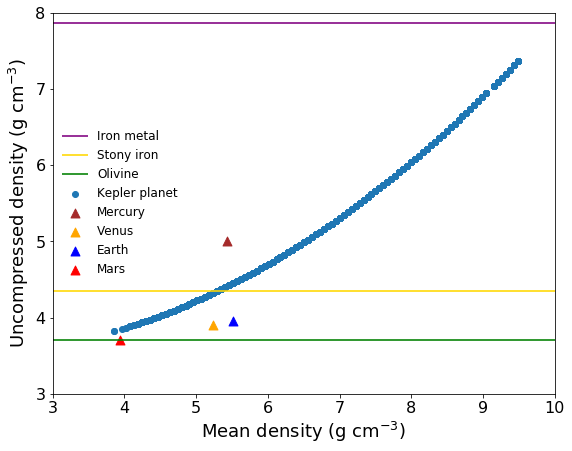

In [20]:
print data_solids
w_iron_metal=data_solids['name'] == 'Iron metal'
w_olivine = data_solids['name'] == 'Olivine'
Iron_metal_density = np.array(data_solids['density (cgs)'][w_iron_metal])
Olivine_density = np.array(data_solids['density (cgs)'][w_olivine])
uncompressed_density_kepler=1e-2*(volume_percentage_core*Iron_metal_density)
uncompressed_density_kepler=uncompressed_density_kepler+1e-2*((100.-volume_percentage_core)*Olivine_density)

uncompressed_density_solar_system=[5.0,3.9,3.96,3.70]

x_ssp = density_solar_system_planets[w_ss_terrestrial]
y_ssp = uncompressed_density_solar_system

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.scatter(density_kepler[w_terrestrial],
           uncompressed_density_kepler[w_terrestrial],label='Kepler planet')
for i,(name,col) in enumerate(zip(solar_system_planets[0:4],colors[0:4])):
    ax.scatter(x_ssp[i],y_ssp[i],marker='^'
               ,s=80,color=col,label=name)
    
xmin = 3
xmax = 10.
for name,rho,col in zip(solids[2:5],density_solids[2:5],colors2[2:5]):
        ax.plot([xmin,xmax],[rho,rho] ,ls='-',linewidth=2.0,color=col,alpha=0.8,label=name)

ax.set_xlabel(r'Mean density (g cm$^{-3}$)')
ax.set_ylabel(r'Uncompressed density (g cm$^{-3}$)')
ax.set_ylim(3,8)
ax.set_xlim(xmin,xmax)
ax.legend()
plt.savefig("kepler_uncompressed_vs_compressed_density.png")
plt.show()

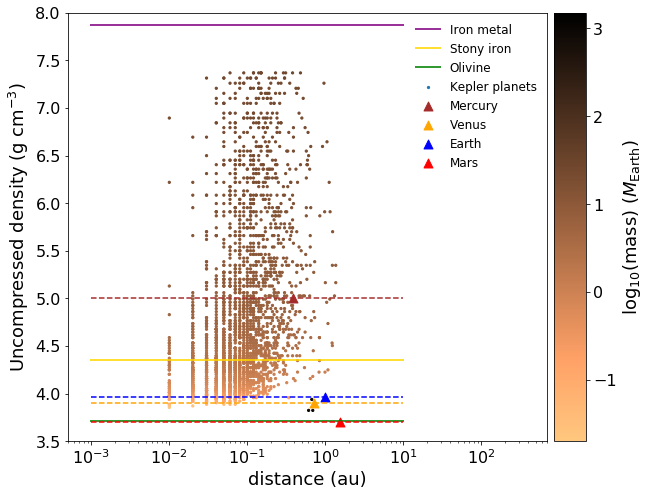

In [21]:
x_ssp = distance_solar_system_planets[w_ss_terrestrial]
y_ssp = uncompressed_density_solar_system

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
s=ax.scatter(distance[w_terrestrial]
             ,uncompressed_density_kepler[w_terrestrial],
             s=5,alpha=1,c=np.log10(mass[w_terrestrial]),
             cmap='copper_r',label='Kepler planets')
ax.set_ylim(3.5,8)
ax.set_xlim(5e-4,700)

xmin = 1e-3
xmax = 10.
for name,rho,col in zip(solids[2:5],density_solids[2:5],colors2[2:5]):
        ax.plot([xmin,xmax],[rho,rho] ,ls='-',linewidth=2.0,
                color=col,alpha=0.8,label=name)

for i,(name,col) in enumerate(zip(solar_system_planets[0:4],colors[0:4])):
    ax.scatter(x_ssp[i],y_ssp[i],marker='^',s=80,color=col,label=name)
    ax.plot([xmin,xmax],[y_ssp[i],y_ssp[i]],color=col,ls='--')

ax.set_xlabel(r'distance (au)', fontsize=18)
ax.set_ylabel(r'Uncompressed density (g cm$^{-3}$)')

ax.set_xscale("log",nonposx='clip')
#ax.set_yscale("log",nonposy='clip')
ax.legend()
colorbar_ax = fig.add_axes([0.85,0.1,0.05,0.85])
fig.colorbar(s, cax=colorbar_ax,label=(r'$\log_{10}$(mass) ($M_{\rm Earth}}$)'))
fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.84,
                        wspace=0.05)
plt.savefig("kepler_uncompressed_vs_distance.png")
plt.show()

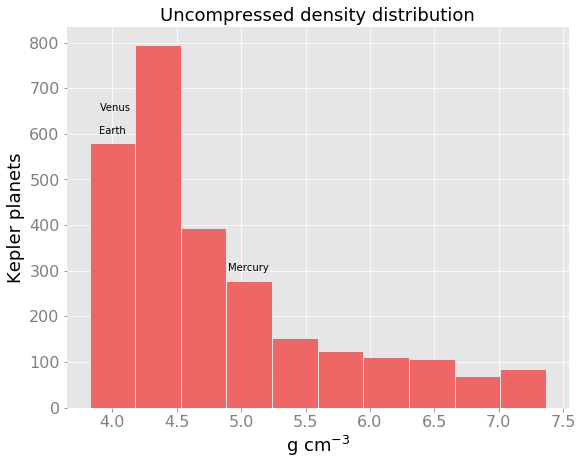

In [59]:
w_stony=data_solids['name'] == 'stony'
stony_density = np.array(data_solids['density (cgs)'][w_stony])
x = uncompressed_density_kepler[w_terrestrial]

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

# use a gray background
ax.set_facecolor('#E6E6E6') # warning new Matplotlib 2.2.0
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666',bins=10);
ax.set_title(r'Uncompressed density distribution',size=18)
ax.set_xlabel(r'g cm$^{-3}$')
ax.set_ylabel(r'Kepler planets')
ax.text(3.9,600,'Earth')
ax.text(3.9,650,'Venus')
ax.text(4.9,300,'Mercury')
plt.savefig("kepler_uncompressed_density_distribution.png")
plt.show()

- S-type asteroids are on average more dense that C-types (grey) 
- Average S-type: 2.7 g/cm3;
- Average C-type: 1.3 g/cm3; 
- Average X-type: 1.85 g/cm3 

From:
- Carry, B., (2012). Density of asteroids. Planetary and Space Science, 73(1), pp.98- 118.
- Murdoch, N. (2016). Physical properties of the surface and sub-surface of asteroids. ASIME 2016: Asteroid Intersections with Mine Engineering, Luxembourg. September 21-22, 2016.
- Scheeres, D.J., Britt, D., Carry, B. and Holsapple, K.A., (2015). Asteroid interiors and morphology. Asteroids IV, pp.745-766.

18 (18,)


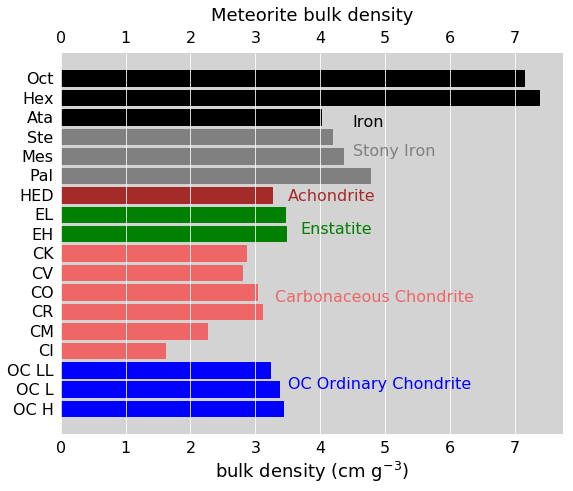

In [23]:
# Data source Carray 2012 Table 2 and and original reference
# OC  Ordinary chondrites
# CC  Carbonaceous Chondrites
# E   Enstatites
# HED Achondrites
# Pal, Mes, Ste  Stony-Iron
# Ata, Hex, Oct  Iron
meteorites=['OC H','OC L','OC LL',
            'CI','CM',
            'CR','CO',
            'CV','CK'
            ,'EH','EL','HED','Pal','Mes','Ste','Ata','Hex','Oct']
meteorites_density=np.array([3.42,3.36,3.22,1.6,2.25,3.1,3.03,2.79,
                    2.85,3.47,3.46,3.25,4.76,4.35,4.18,4.01,7.37,7.14])
print len(meteorites),meteorites_density.shape
mcolors = ['blue','blue','blue','#EE6666',
           '#EE6666','#EE6666','#EE6666','#EE6666','#EE6666',
          'green','green','brown','gray','gray','gray',
          'black','black','black']

default = {'axes.spines.bottom' : True,
                     'axes.spines.top' : True,
                     'axes.spines.left' : True,
                     'axes.spines.right' : True,
                     'axes.facecolor': 'w',
                     'xtick.top': True,
                     'xtick.bottom': True,
                     'ytick.left': True,
                     'ytick.right': True,
                     'xtick.labeltop': False}

mpl.rcParams.update({'axes.spines.bottom' : False,
                     'axes.spines.top' : False,
                     'axes.spines.left' : False,
                     'axes.spines.right' : False,
                     'axes.facecolor': 'lightgray',
                     'xtick.top': False,
                     'xtick.bottom': False,
                     'ytick.left': False,
                     'ytick.right': False,
                     'xtick.labeltop': True})

plt.figure(figsize=(9,7))
ind = np.arange(0,18,1)
plt.barh(ind,meteorites_density,edgecolor=mcolors, color=mcolors)
plt.yticks(ind,meteorites)
plt.grid(color='w', linestyle='solid',which='major',axis='x')
lsize = 16
plt.text(3.5,1,'OC Ordinary Chondrite',color='blue',size=lsize)
plt.text(3.3,5.5,'Carbonaceous Chondrite',color='#EE6666',size=lsize)
plt.text(3.7,9,'Enstatite',color='green',size=lsize)
plt.text(3.5,10.7,'Achondrite',color='brown',size=lsize)
plt.text(4.5,13,'Stony Iron',color='gray',size=lsize)
plt.text(4.5,14.5,'Iron',color='black',size=lsize)
plt.xlabel(r'bulk density (cm g$^{-3}$)')
plt.title(r'Meteorite bulk density',size=18, pad=32) # pad to allow space above the labels
plt.show()
mpl.rcParams.update(default)


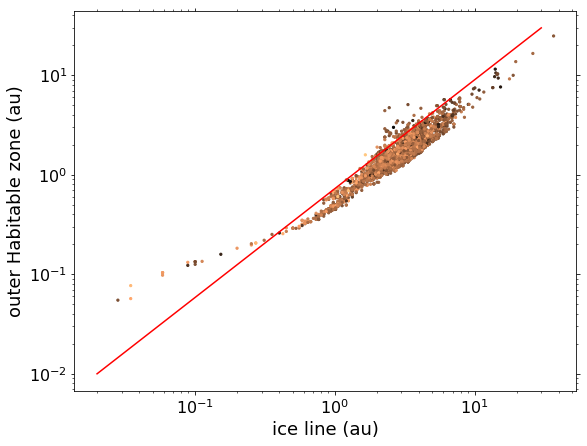

In [24]:
maxHabZone=kepler['S. Hab Zone Max (AU)']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
# factor 0.85 on the density?
s=ax.scatter(ice_line_kepler,maxHabZone,
             s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_xscale("log",nonposx='clip')
ax.set_yscale("log",nonposy='clip')
ax.set_xlabel(r'ice line (au)', fontsize=18)
xmin = 0.02
xmax = 30
xmin = 0.02
ymax = 30
ax.plot([xmin,xmax],[ymin,ymax],color='red')
ax.set_ylabel(r'outer Habitable zone (au)', fontsize=18)
plt.show()

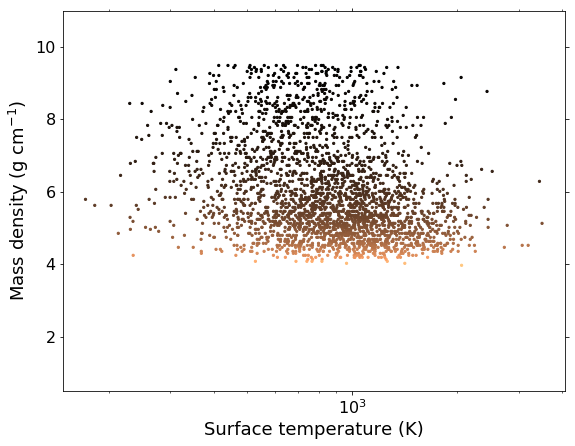

In [25]:
Teq = kepler['P. Teq Mean (K)']
Ts = kepler['P. Ts Mean (K)']
fig = plt.figure(figsize=(9,7))

ax = plt.subplot(111)
# factor 0.85 on the density? because of compressed matter at high pressure
s=ax.scatter(Ts,density_kepler,
             s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_ylim(0.5,11)
ax.set_xlabel(r'Surface temperature (K)', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xscale("log",nonposx='clip')

plt.show()


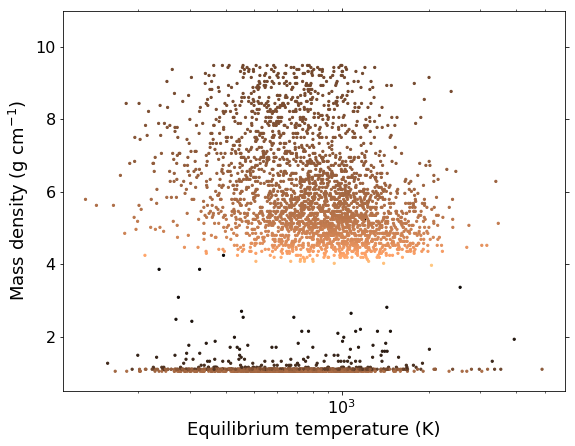

In [26]:
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
# factor 0.85 on the density?
s=ax.scatter(Teq,density_kepler,
             s=5,alpha=1,c=np.log10(mass),cmap='copper_r',label='Kepler planets')
ax.set_ylim(0.5,11)
ax.set_xlabel(r'Equilibrium temperature (K)', fontsize=18)
ax.set_ylabel(r'Mass density (g cm$^{-1}$)', fontsize=18)
ax.set_xscale("log",nonposx='clip')
plt.show()

In [27]:
data_clf = kepler[['P. Mass (EU)','P. Radius (EU)','P. Density (EU)']].dropna()
X = data_clf[['P. Mass (EU)','P. Radius (EU)']]
# we select planets with density higher than 3 g/cm^3 (g cc)
y = (data_clf['P. Density (EU)']*density_Earth > 3.0).astype(int)

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,random_state=2018)

In [29]:
# test if a neural network can find the density criterion to classify the type of planets
clf=MLPClassifier(hidden_layer_sizes=(100,100),early_stopping=True)
clf.fit(X_train, y_train)
NN_train_pred = clf.predict(X_train)
NN_train_score = clf.score(X_train, y_train)
NN_test_score = clf.score(X_test, y_test)
print NN_train_score,NN_test_score

0.998671096345515 0.99734395750332


In [30]:
# the task is very easy indeed
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(15,weights='uniform')
clf.fit(X_train, y_train)
kNN_train_pred = clf.predict(X_train)
kNN_train_score = clf.score(X_train, y_train)
kNN_test_score = clf.score(X_test, y_test)
print kNN_train_score,kNN_test_score

0.998671096345515 0.99734395750332


In [31]:
# Classification of the planet atmosphere type using the planets mass, radius, 
# distance from the central star, and the stellar luminosity
# atmosphere can be : hydrogen-rich, metals-rich, no-atmosphere

# remove NaN
data_clf=kepler[['P. Mass (EU)',
                 'P. Radius (EU)',
                 'P. Mean Distance (AU)',
                 'S. Luminosity (SU)',
                 'P. Atmosphere Class']].dropna()


# encoding the atmosphere classes
data_clf["P. Atmosphere Class"] = np.where(data_clf["P. Atmosphere Class"]=="hydrogen-rich",0,
                              np.where(data_clf["P. Atmosphere Class"]=="metals-rich",1,
                              np.where(data_clf["P. Atmosphere Class"]=="no-atmosphere",2,3)))
data_clf.head()

P. Mass (EU)  P. Radius (EU)  P. Mean Distance (AU)  S. Luminosity (SU)  \
2          22.53            4.84                   0.05            0.273422   
4          72.12            7.07                   0.06            2.999530   
5          14.12            4.14                   0.04            2.354973   
15         17.76            2.28                   0.11            2.293221   
16          2.16            1.31                   0.07            2.293221   

    P. Atmosphere Class  
2                     1  
4                     1  
5                     1  
15                    1  
16                    2

In [32]:
X = data_clf[['P. Mass (EU)',
              'P. Radius (EU)',
              'P. Mean Distance (AU)',
              'S. Luminosity (SU)']]

y = data_clf['P. Atmosphere Class']
X_= np.array(X)
y = np.array(y).astype(int)

# standard scaling of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
Xs = std_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, 
                                                    test_size=0.2,random_state=2018)

# K-nearest neighbors classifier
clf=KNeighborsClassifier(15,weights='distance') # better than uniform
clf.fit(X_train, y_train)
kNN_train_pred = clf.predict(X_train)
kNN_train_score = clf.score(X_train, y_train)
kNN_test_score = clf.score(X_test, y_test)
print kNN_train_score,kNN_test_score

1.0 0.9588313413014609


In [33]:
# XGBoost 5-fold cross-validation with early-stopping
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# help("xgboost.sklearn.XGBClassifier")
def XGBclassify():
    
    train_score = []
    valid_score  = []
    test_score  = []
        
    kfold  = StratifiedKFold(n_splits=5, random_state=2018,shuffle=True)
    rnd = 1211
    
    clf_XGB = XGBClassifier(n_estimators = 100,
                            max_depth=5,objective='multi:softmax',
                            seed=rnd,learning_rate=0.1,booster='gbtree')
    
    for (t,v) in kfold.split(X_train,y_train):
        
        clf_XGB.fit(X_train[t],y_train[t], early_stopping_rounds=50, 
                    eval_set=[(X_train[v],y_train[v])], verbose=False)
        train_score.append(accuracy_score(y_train[t],clf_XGB.predict(X_train[t])))
        valid_score.append(accuracy_score(y_train[v],clf_XGB.predict(X_train[v])))
        test_score.append(accuracy_score(y_test,clf_XGB.predict(X_test)))
        
    train_score  = np.array(train_score)
    valid_score  = np.array(valid_score)
    test_score   = np.array(test_score)
    
    return train_score,valid_score,test_score,clf_XGB.feature_importances_

train_score, valid_score, test_score, fimport = XGBclassify()
print 'scores',train_score.mean(), valid_score.mean(), test_score.mean()


scores 0.9995017300274229 0.9621178111821035 0.9715803452855246


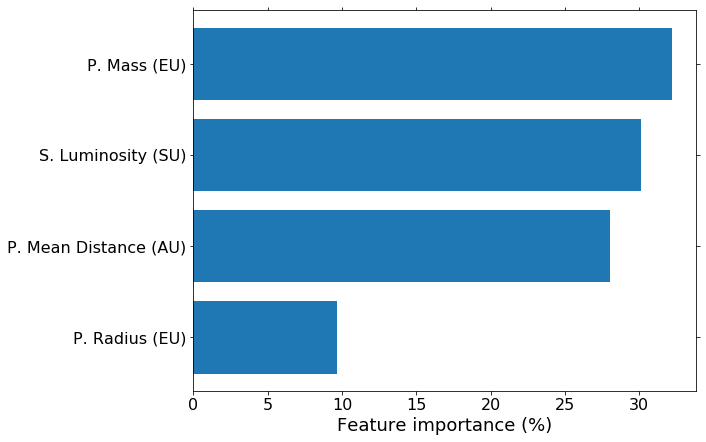

In [34]:
# Plot feature importance
importance = pd.Series(fimport*100.,index=list(data_clf)[0:4]) # list(df) list the headers
importance = importance.sort_values(ascending=True) # convert the xgboost output as a serie
ind = np.arange(0,4,1)
plt.figure(figsize=(9,7))
plt.barh(ind,importance)
plt.yticks(ind,importance.index)
plt.xlabel('Feature importance (%)')
plt.show()

In [35]:
# help("sklearn.neural_network.MLPClassifier")
# For small datasets, however, 'lbfgs' can converge faster and perform better.
clf=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50,150,50),early_stopping=True)
clf.fit(X_train, y_train)
NN_train_pred = clf.predict(X_train)
NN_train_score = clf.score(X_train, y_train)
NN_test_score = clf.score(X_test, y_test)
print NN_train_score,NN_test_score

0.9916943521594684 0.9880478087649402


In [36]:
from LVQClassifier import *
clf=LVQClassifier(n_components=20,alpha=0.3,epochs=10,initial_state='Uniform',LVQ2=True)
clf.fit(X_train, y_train)
LVQ_train_pred = clf.predict(X_train)
LVQ_train_score = clf.score(X_train, y_train)
LVQ_test_score = clf.score(X_test, y_test)
print LVQ_train_score,LVQ_test_score

0.9235880398671097 0.9455511288180611


### Classification on the habitability

In [37]:
from astroML.utils import completeness_contamination
from sklearn import metrics

def comp_cont(y_prob):
    thresholds = np.linspace(0, 1, 1001)[:-1]
    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(pred, y_test)
    return comp, cont 

In [38]:
def plot_completeness_efficiency(title):
    comp, cont = comp_cont(y_prob)
    plt.plot(1 - cont, comp)
    plt.xlabel('Efficiency')
    plt.ylabel('Completeness')
    plt.title(title)
    plt.show()

In [39]:
from sklearn.metrics import (accuracy_score,brier_score_loss, 
                             precision_score, 
                             recall_score, f1_score)
def scoring(clf,fit=True):
    if(fit == True):
        clf.fit(X_train, y_train)
        
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] 
    
    solar_system_pred = clf.predict(X_solar_system)
    solar_system_prob = clf.predict_proba(X_solar_system)[:, 1] 
    
    brier     = brier_score_loss(y_test, y_prob, pos_label=y.max())
    precision   = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)

    solar_system_brier     = brier_score_loss(y_solar_system, 
                                              solar_system_prob, pos_label=y.max())
    solar_system_precision  = precision_score(y_solar_system, 
                                              solar_system_pred)
    solar_system_recall    = recall_score(y_solar_system, solar_system_pred)

    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    solar_system_score = clf.score(X_solar_system, y_solar_system)
    
    print("\tscore (train): %1.3f" % train_score)
    print("\tscore (test): %1.3f" % test_score)
    print("\tscore (solar system): %1.3f" % solar_system_score)
    print solar_system_prob
    print "Test"
    print("\tBrier: %1.3f" % brier)
    print("\tPrecision (Efficiency): %1.3f" % precision) 
    print("\tRecall (Completeness): %1.3f" % recall) 
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
    print "Solar System"
    print("\tBrier: %1.3f" % solar_system_brier)
    print("\tPrecision (Efficiency): %1.3f" % solar_system_precision) 
    print("\tRecall (Completeness): %1.3f" % solar_system_recall) 
    print("\tF1: %1.3f\n" % f1_score(y_solar_system, solar_system_pred))
    print
    return y_pred, y_prob

In [40]:
def plot_confusion():
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Not Habitable','Habitable']
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 16)
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45, size = 12)
    plt.yticks(tick_marks, labels, size = 12)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 16)
    plt.xlabel('Predicted label', size = 16)
    width, height = cm.shape
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                     horizontalalignment='center',
                     verticalalignment='center',fontsize=18)
    plt.colorbar()
    plt.show()

In [41]:
data_clf=kepler[['P. Mass (EU)',
                 'P. Radius (EU)',
                 'P. Mean Distance (AU)',
                 'S. Luminosity (SU)',
                 'S. Size from Planet (deg)',
                 'P. Habitable']].dropna()

data_clf.head()
X = data_clf[['P. Mass (EU)',
              'P. Radius (EU)',
              'P. Mean Distance (AU)',
              'S. Luminosity (SU)']]

X = np.array(X).astype(float)
y = data_clf['P. Habitable']
y = np.array(y).astype(int)
print 'classes:',np.unique(y_train)

X_solar_system = np.dstack((mass_solar_system_planets
                            ,radius_solar_system_planets
                            ,distance_solar_system_planets
                           ,np.full(8,1))).reshape(8,4)
y_solar_system = np.array([0,0,1,0,0,0,0,0])

# standard scaling of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
Xs = std_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, 
                                                    test_size=0.2,random_state=2018)
X_solar_system

classes: [0 1 2]


array([[5.53000e-02, 3.82500e-01, 3.87000e-01, 1.00000e+00],
       [8.15000e-01, 9.48800e-01, 7.23300e-01, 1.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.07489e-01, 5.30000e-01, 1.52300e+00, 1.00000e+00],
       [3.18000e+02, 1.12000e+01, 5.20000e+00, 1.00000e+00],
       [9.50000e+01, 9.40000e+00, 9.50000e+00, 1.00000e+00],
       [1.45000e+01, 4.00000e+00, 1.92000e+01, 1.00000e+00],
       [1.71000e+01, 3.90000e+00, 3.01000e+01, 1.00000e+00]])

In [42]:
# K-nearest neighbors classifier
clf=KNeighborsClassifier(15,weights='distance')
y_pred, y_prob = scoring(clf)

	score (train): 1.000
	score (test): 0.989
	score (solar system): 0.875
[0.         0.         0.         0.         0.         0.
 0.         0.19418191]
Test
	Brier: 0.008
	Precision (Efficiency): 0.750
	Recall (Completeness): 0.300
	F1: 0.429

Solar System
	Brier: 0.130
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


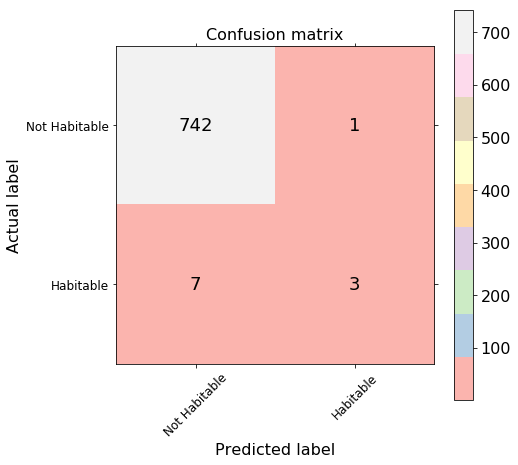

In [43]:
# Plot the confusion matrix
plot_confusion()

In [44]:
# XGBoost
rnd = 2018
clf_XGB = XGBClassifier(n_estimators = 100,
                            max_depth=5,objective='binary:logistic',
                            seed=rnd,learning_rate=0.1,booster='gbtree')        
clf_XGB.fit(X_train,y_train, early_stopping_rounds=50, 
                    eval_set=[(X_test,y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2018,
       silent=True, subsample=1)

In [45]:
y_pred, y_prob = scoring(clf,fit=False)

	score (train): 1.000
	score (test): 0.989
	score (solar system): 0.875
[0.         0.         0.         0.         0.         0.
 0.         0.19418191]
Test
	Brier: 0.008
	Precision (Efficiency): 0.750
	Recall (Completeness): 0.300
	F1: 0.429

Solar System
	Brier: 0.130
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




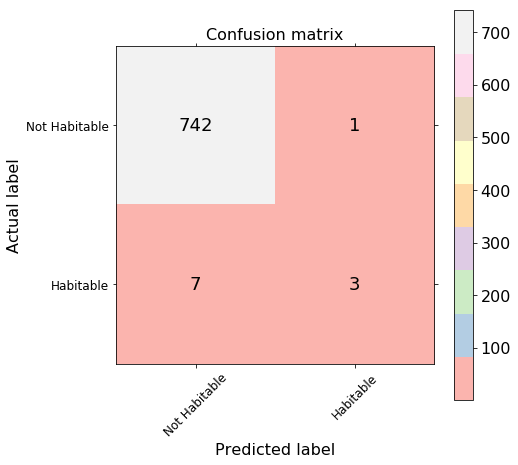

In [46]:
plot_confusion()

P. Mass (EU)             10.608424
P. Radius (EU)           12.948518
P. Mean Distance (AU)    38.689548
S. Luminosity (SU)       37.753510
dtype: float32


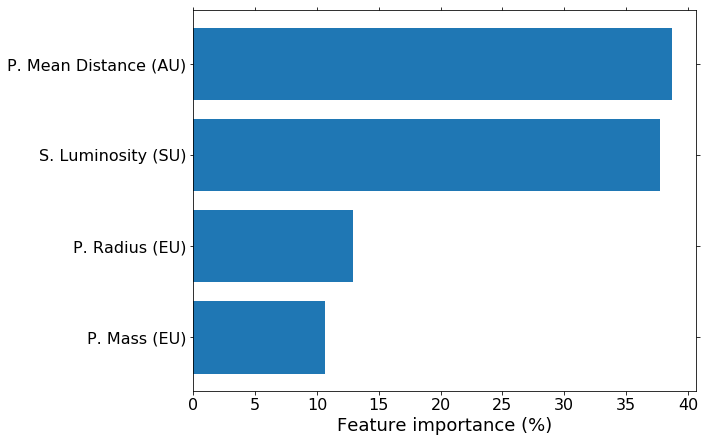

In [47]:
# Plot feature importance
fimport = clf_XGB.feature_importances_
# convert the xgboost output as a serie
importance = pd.Series(fimport*100.,index=list(data_clf)[0:X.shape[1]]) # list(df) list the headers
print importance
importance = importance.sort_values(ascending=True) # sort the values before plotting
ind = np.arange(0,X.shape[1],1)   # indices from 0 to 4 with step of 1
plt.figure(figsize=(9,7))
plt.barh(ind,importance) # horizontal bars
plt.yticks(ind,importance.index) # importance.index are the name of the features
plt.xlabel('Feature importance (%)')
plt.show()

The planet mean distance and the stellar luminosity determine the Habitable zone (inner and outer limit), while the planet radius and mass constrain the type planet, i.e. if the planet has a solid surface.

In [48]:
# Deep Neural Network
clf=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50,150,50),
                  early_stopping=True,random_state=10)
y_pred, y_prob = scoring(clf)

	score (train): 1.000
	score (test): 0.999
	score (solar system): 0.875
[0. 0. 0. 0. 0. 0. 0. 0.]
Test
	Brier: 0.001
	Precision (Efficiency): 1.000
	Recall (Completeness): 0.900
	F1: 0.947

Solar System
	Brier: 0.125
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




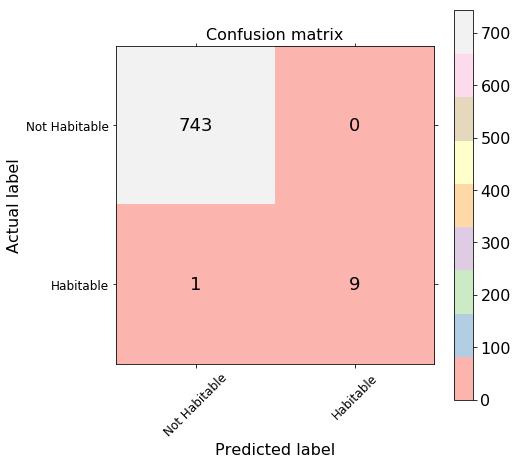

In [49]:
plot_confusion() # the neural network misses two habitable planets

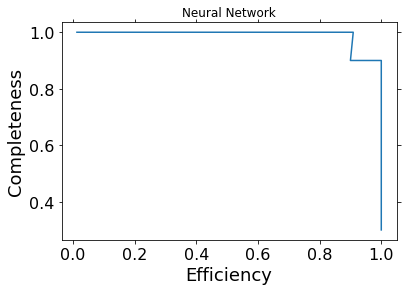

In [50]:
plot_completeness_efficiency('Neural Network')

In [51]:
# Learning Vector Quantization
from LVQClassifier import *
clf=LVQClassifier(n_components=150,alpha=0.3,p=2,epochs=20,initial_state='Uniform',LVQ2=True)
y_pred, y_prob = scoring(clf)

	score (train): 0.919
	score (test): 0.919
	score (solar system): 0.625
[0.42905645 0.44925343 0.40776037 0.47296973 0.49899367 0.49693661
 0.53160667 0.529101  ]
Test
	Brier: 0.093
	Precision (Efficiency): 0.141
	Recall (Completeness): 1.000
	F1: 0.247

Solar System
	Brier: 0.252
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




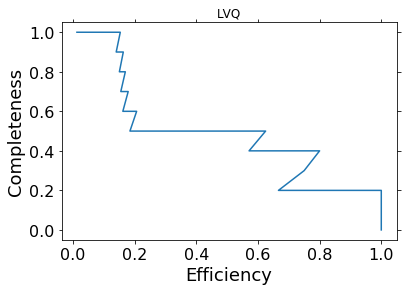

In [52]:
plot_completeness_efficiency('LVQ')

In [53]:
# Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=100,class_weight='balanced')
y_pred, y_prob = scoring(clf)

	score (train): 0.954
	score (test): 0.947
	score (solar system): 0.375
[4.82911463e-25 4.58423477e-25 1.05377308e-24 1.11625624e-23
 1.00000000e+00 9.99547736e-01 8.04151673e-01 1.00000000e+00]
Test
	Brier: 0.037
	Precision (Efficiency): 0.200
	Recall (Completeness): 1.000
	F1: 0.333

Solar System
	Brier: 0.581
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




In [54]:
# Orthogonal Distance Regression Methods
# One-versus-the-Rest
from ODLinear import (OrthogonalDistanceLogisticRegressionOVR,
                      OrthogonalDistanceMultinomialLogisticRegression)
clf=OrthogonalDistanceLogisticRegressionOVR(C=100)
y_pred, y_prob = scoring(clf)

	score (train): 0.990
	score (test): 0.989
	score (solar system): 0.500
[1.12072329e-76 1.47887992e-77 1.65363954e-76 2.88505988e-73
 1.00000000e+00 1.00000000e+00 7.48423232e-03 1.00000000e+00]
Test
	Brier: 0.010
	Precision (Efficiency): 0.625
	Recall (Completeness): 0.500
	F1: 0.556

Solar System
	Brier: 0.500
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




In [55]:
# Orthogonal Distance Regression Mutinomial Method
clf=OrthogonalDistanceMultinomialLogisticRegression(C=100,tol=1e-2)
y_pred, y_prob = scoring(clf)

	score (train): 0.990
	score (test): 0.989
	score (solar system): 0.500
[4.52238075e-39 1.55622707e-39 5.23016591e-39 2.35706245e-37
 1.00000000e+00 1.00000000e+00 4.90583911e-02 1.00000000e+00]
Test
	Brier: 0.009
	Precision (Efficiency): 0.625
	Recall (Completeness): 0.500
	F1: 0.556

Solar System
	Brier: 0.500
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




In [56]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
y_pred, y_prob = scoring(clf)

	score (train): 0.898
	score (test): 0.896
	score (solar system): 0.875
[7.19167920e-37 1.47511464e-61 2.85441711e-71 2.19489753e-37
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Test
	Brier: 0.078
	Precision (Efficiency): 0.085
	Recall (Completeness): 0.700
	F1: 0.152

Solar System
	Brier: 0.125
	Precision (Efficiency): 0.000
	Recall (Completeness): 0.000
	F1: 0.000




It seems to be quite easy to predict the habitability of an exoplanet! But in fact the classes are imbalance, so that the accuracy score is not a good measure of classification sucess. Other scoring metrics such as precision, recall, and F1 reveal that the neural network performs quite well in term of completeness and efficiency.

The algorithms were trained with the Kepler-discovered planets and are not capable to determine the hability of the planets in the Solar System.